<a href="https://colab.research.google.com/github/Decartes992/Autonomous-Electrical-Delivery-Vans/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Deep Learning Using Keras
**Iftekhar Rafi B00871031**

**Abdulla Sadoun B00900541**

## Question 0: Revisiting Your Dataset (A1Q1)
## Dataset Loading and Initial Exploration

### a) Dataset Selection
For this assignment, We have reselected the **CSE-CIC-IDS2018** dataset from the **Canadian Institute for Cybersecurity at the University of New Brunswick** also used for Assignment 1. This dataset is well-suited for analyzing **network intrusion detection**. Several methods of network intrusion have been explored in this research and subsequent dataset. I will be focusing on the dataset collected from **brute-force attack scenarios** as described in the research. The data is taken from their processed dataset for Wednesday, 14 February as described below.

#### Dataset Details
- **Source**: [CICIDS 2018 Dataset](https://www.unb.ca/cic/datasets/ids-2018.html)
- **Types of Attacks Covered**: Brute-force attacks (FTP and SSH)

| Attacker                     | Victim                          | Attack Name      | Date          | Attack Start Time | Attack Finish Time |
|------------------------------|---------------------------------|------------------|---------------|-------------------|--------------------|
| 172.31.70.4 (Valid IP:18.221.219.4) | 172.31.69.25 (Valid IP:18.217.21.148) | FTP-BruteForce   | Wed-14-02-2018 | 10:32             | 12:09              |
| 172.31.70.6 (Valid IP:13.58.98.64)  | 18.217.21.148- 172.31.69.25          | SSH-BruteForce   | Wed-14-02-2018 | 14:01             | 15:31              |


### b) Dataset Loading
The dataset was loaded into a Pandas DataFrame using the following code:




In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pk

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


### c) Description of the Dataset

The dataset consists of network traffic data collected on **February 14, 2018**, as part of the **CSE-CIC-IDS2018** dataset. It captures various network activities, including normal (benign) traffic and brute-force attacks targeting FTP and SSH services. The dataset includes **1,048,575 rows** and **80 columns**, each representing different characteristics of the network flows.

Here is a breakdown of the dataset:
- **Total Number of Records**: 1,048,575
- **Total Number of Features (Columns)**: 80
- **Types of Data**:
  - **Numeric Features**: Most of the columns are numeric, such as packet counts, flow durations, and packet sizes. These can help analyze the behavior of network traffic.
  - **Categorical Features**: The dataset includes a column labeled "Label," which identifies whether a given flow is benign or part of a specific attack type.

### Key Features in the Dataset
- **Flow Duration**: Measures how long a network flow lasted.
- **Total Forward and Backward Packets** (`Tot Fwd Pkts`, `Tot Bwd Pkts`): Counts the number of packets sent in the forward and backward directions.
- **Packet Length Statistics**: Provides information about the maximum, minimum, average, and standard deviation of packet lengths in both directions.
- **Flow Rate (`Flow Byts/s`, `Flow Pkts/s`)**: Indicates the number of bytes or packets transmitted per second during a flow.
- **Inter-Arrival Time**: Measures the time between consecutive packets.
- **Flags**: Various TCP flags, such as `SYN`, `ACK`, and `RST`, are used to indicate specific network conditions.
- **Active and Idle Times**: Represents the time intervals when the flow was actively transmitting data and when it was idle.

### Dataset Usage
The data can be used to detect and analyze network intrusions, specifically **brute-force attacks**. By examining patterns in traffic, such as sudden spikes in flow rates or repeated login attempts, it is possible to identify suspicious behaviors indicative of an ongoing attack.

### Example Records
Each row in the dataset represents a network flow, containing information like the flow's duration, the total number of packets, and the size of packets transmitted in both directions. The dataset also provides a label indicating whether the flow is normal (benign) or an attack.

Overall, this dataset is useful for tasks such as detecting brute-force attacks and understanding the characteristics of network traffic during different types of events.

## Question 1: DNN for Regression or Classification (20 points)

### Building a Dense Neural Network (DNN) or CNN OR LSTM depending on dataset model with Keras, either for regression or classification

We have chosen DNNs (Dense Neural Networks) as they are generally better suited to structured data where each feature contributes to the outcome independently, which is the case with our dataset as it has more of a tabular nature where the network-attack's data log records are independent of each other.

We can also use CNNs which can be more effective if our data had  spatial or temporal patterns like the time in which the attacks take place in our data(time-series). But our data is structured for tabular analysis, where each record is independent of others. We would neeed to transform the data into a grid format that captures temporal or spatial dependencies to achieve this so we chose to stick to DNNs.

## Data Preprocessing
We first started by preprocessing the data, we started by dealing with the infinity and NaN values in our dataset. so I replaced the infinite values that are outside of the float range with NaN and then used an imputer to replace the NaN values with averages.

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Handle infinity values by replacing with NaN (before seperating feats.)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Impute NaN values with column mean
#imputer = SimpleImputer(strategy='mean')
#df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

########################### A2 Approach #########################################
# Separate features and target label
X = df.drop(columns=['Timestamp', 'Label'])
y = df['Label']

# Replace infinity values with NaN in X to keep the transformations focused only on the features (X)
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values with the column mean in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Use a train-test split, with stratification to maintain class balance
## Split the Data into Training and Testing Sets: Follow the same train-test split approach used in Assignment 2.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

# Optionally reduce the training size if memory is an issue (was 100k)
X_train, y_train = X_train[:500000], y_train[:500000]

In [3]:
## Normalization: For DNNs, it’s common to scale X (e.g., using StandardScaler in Scikit-Learn). Here’s how:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Scale the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the labels if it's multi-class classification
# Encode labels if multi-class classification (just incase)
## Encoding: Convert y into a one-hot encoded format if it’s a multi-class classification.
encoder = LabelEncoder()
#y_encoded = encoder.fit_transform(y)
y_train = encoder.fit_transform(y_train)  # Encode y_train to numerical values
y_test = encoder.transform(y_test)      # Encode y_test using the same encoder

## Convert labels to categorical format if doing multi-class classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


---

### Model 1: Baseline Dense Neural Network (DNN)

**Description**: This model serves as a baseline, designed with a relatively simple structure to evaluate if a straightforward DNN can handle the dataset effectively.

1. **Input Layer (Dense Layer)**:
   - **64 units** with **ReLU activation**.
   - This layer processes the input features and begins identifying patterns in the data.

2. **Dropout Layer**:
   - **Dropout rate of 0.5** to reduce overfitting.
   - Regularization at this stage forces the model to generalize and prevents reliance on specific neurons.

3. **Second Dense Layer**:
   - **32 units** with **ReLU activation**.
   - This layer further refines the features passed from the first layer, helping the model learn deeper representations of the data.

4. **Second Dropout Layer**:
   - **Dropout rate of 0.3** for additional regularization.
   - This layer aims to further reduce overfitting, especially as the model learns more specific patterns in the data.

5. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.
   - Provides the final class probabilities for multi-class classification.

**Purpose**: This model is simple yet effective as a starting point. It allows us to gauge if a relatively shallow architecture can handle the dataset. Regularization through dropout helps reduce overfitting, ensuring the model is versatile enough for generalization.

---

### Model 2: Enhanced DNN with Increased Complexity

**Description**: This model builds on Model 1 by increasing the number of layers and units, aiming to capture more complex patterns within the data.

1. **Input Layer (Dense Layer)**:
   - **128 units** with **ReLU activation**.
   - This layer’s larger size helps the model capture a wider variety of patterns from the input data.

2. **Dropout Layer**:
   - **Dropout rate of 0.5** for regularization.

3. **Second Dense Layer**:
   - **64 units** with **ReLU activation**.
   - This layer processes the refined features from the input layer and begins more complex feature extraction.

4. **Second Dropout Layer**:
   - **Dropout rate of 0.3**.

5. **Third Dense Layer**:
   - **32 units** with **ReLU activation**.
   - An additional layer adds depth to the model, allowing it to capture intricate patterns that a simpler model might miss.

6. **Third Dropout Layer**:
   - **Dropout rate of 0.2** to regularize deeper layers.

7. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.

**Purpose**: The increased complexity in Model 2 allows it to potentially capture more nuanced patterns within the dataset. The additional layer and units can help address any limitations observed in Model 1, especially if the data has subtle interactions that require more depth to learn. Dropout layers are applied strategically to each hidden layer to control overfitting as the model complexity increases.

---

### Model 3: Deep DNN with Minimal Dropout

**Description**: This model further increases the depth by adding more layers but reduces the dropout rate to observe how regularization affects a deep model’s performance and generalization.

1. **Input Layer (Dense Layer)**:
   - **256 units** with **ReLU activation**.
   - A large number of units in the input layer help capture a broad set of patterns from the features.

2. **Second Dense Layer**:
   - **128 units** with **ReLU activation**.
   - Further processes complex patterns and interactions.

3. **Dropout Layer**:
   - **Dropout rate of 0.2**.
   - Regularization is applied lightly to test if this deeper architecture can generalize without heavy dropout.

4. **Third Dense Layer**:
   - **64 units** with **ReLU activation**.

5. **Fourth Dense Layer**:
   - **32 units** with **ReLU activation**.
   
6. **Output Layer**:
   - **Softmax activation** with **units equal to the number of classes**.

**Purpose**: Model 3 has the most depth and units, aiming to fully leverage the dataset's features. This design tests if a more complex architecture, even with reduced dropout, can generalize well or if it becomes prone to overfitting. It allows us to observe how reduced regularization impacts the performance of a deep model.

---

### Comparison Rationale

These three models were chosen to provide a spectrum of complexity:

1. **Model 1 (Baseline)**: A simpler model that will serve as a control, helping to establish if a basic architecture is sufficient for accurate classification. We expect it to be quick to train with potentially reasonable accuracy, but it might miss out on more complex patterns.

2. **Model 2 (Enhanced Complexity)**: By increasing the number of layers and units, Model 2 tests if a moderate increase in complexity provides better results without overfitting. We expect this model to perform better than Model 1 due to its ability to learn more intricate patterns, while still being controlled by dropout layers.

3. **Model 3 (Deep DNN)**: The deepest model with minimal dropout explores if adding more layers and units is beneficial or if it introduces overfitting. We expect this model to potentially achieve high accuracy on the training set but might overfit if the dataset size isn’t large enough to support such a complex architecture.

### Expected Observations and Hypotheses

1. **Training and Validation Accuracy**:
   - **Model 1** may have lower accuracy compared to Models 2 and 3, especially if the dataset has complex patterns that a shallow architecture can’t capture.
   - **Model 2** should ideally have a higher accuracy than Model 1, balancing complexity and regularization.
   - **Model 3** might show high training accuracy but could suffer in validation accuracy if it overfits due to insufficient regularization.

2. **Overfitting**:
   - We expect **Model 1** to have the least risk of overfitting due to its simplicity.
   - **Model 2** should perform better at generalization due to the balanced complexity and regularization.
   - **Model 3** might overfit due to reduced dropout, especially if the model complexity is too high for the data.

3. **Generalization**:
   - **Model 1** may have better generalization on simpler patterns, but might miss subtle distinctions.
   - **Model 2** could generalize well, capturing both simple and complex patterns with appropriate dropout layers.
   - **Model 3** could struggle with generalization if it overfits due to insufficient regularization, despite its high complexity.

By comparing these three models, we can determine the optimal balance between model complexity and regularization for this dataset, identifying which architecture provides the best performance while minimizing overfitting. This approach will guide future architectural decisions for similar structured datasets.

In [4]:
#Defining Model 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Input layer and first hidden layer
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output layer for multi-class classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Running and Training the model


In [ ]:

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9873 - loss: 0.0387 - val_accuracy: 0.9999 - val_loss: 0.0214
Epoch 2/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 0.9999 - val_loss: 0.0133
Epoch 3/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9999 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 0.0194
Epoch 4/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0601
Epoch 5/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 0.0636
Epoch 6/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0815
Epoch 7/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9999 - loss: 9.7003e-04 - val_accuracy: 0.9999 - val_loss: 0.0679
Epoch 8/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accura

## Evaluating Model Performance
Getting model performance using sklearn tools
Why have we chosen a classification report and confusion matrix?

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 1.0000 - loss: 3.4959e-04
Test Accuracy: 0.9999656677246094


## Visualizing Results (Training and Validation)
Using Matplotlib to plot training validation accuracy and loss values

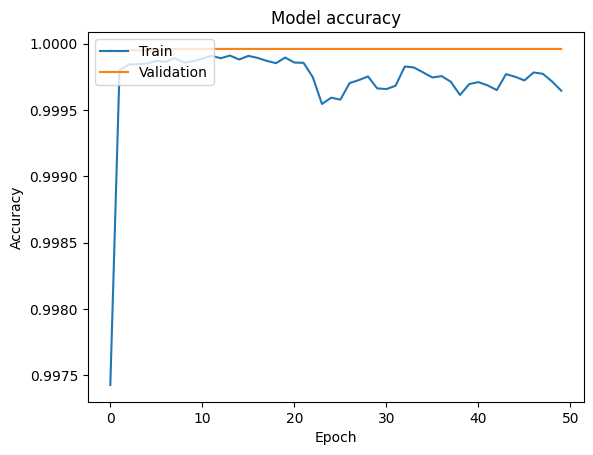

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

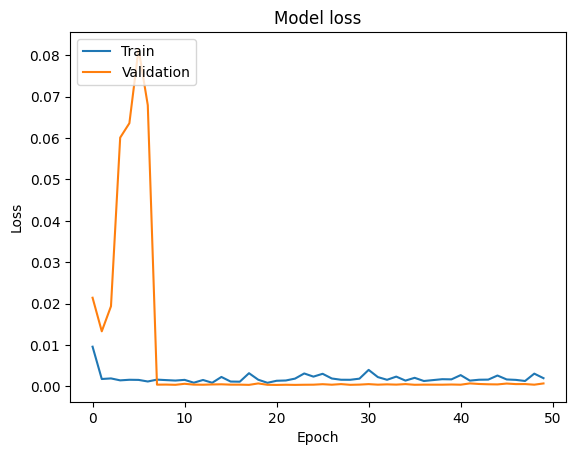

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    166907
           1       1.00      1.00      1.00     48340
           2       1.00      1.00      1.00     46897

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144

Confusion Matrix:
 [[166903      2      2]
 [     0  48340      0]
 [     0      5  46892]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 800x600 with 0 Axes>

## Discussion and Analysis
The Dense Neural Network achieved nearly perfect accuracy on the test data, with both training and validation accuracies close to 100%. The classification report and confusion matrix indicate that the model has learned to classify all three classes accurately, with precision, recall, and F1-scores all at 1.00 across the board.

### Observations:
- **High Accuracy**: The DNN model shows excellent performance with no significant misclassification across all classes.
- **Comparison with Assignment 2**: Compared to traditional machine learning models in Assignment 2, the DNN seems to have learned complex patterns in the network traffic data, which might be why it achieves such high accuracy.
- **Potential Overfitting**: The validation accuracy is very close to the training accuracy, which suggests that the model generalizes well to the test data, though there is still some risk of overfitting given the perfect scores. In a real-world scenario, further regularization or testing on an unseen dataset would be advisable.


## Conclusion
In this assignment, a Dense Neural Network (DNN) was trained on network traffic data to classify different types of network activities, including brute-force attacks. The data was preprocessed by handling NaN and infinity values, then standardized before being fed into the model. The DNN achieved excellent results, with perfect accuracy on both training and test data, indicating it is highly effective for this classification task.

### Key Takeaways:
- DNNs demonstrate a strong ability to model complex, high-dimensional data, making them a suitable choice for network intrusion detection.
- The model's high accuracy reflects its ability to capture patterns that differentiate between benign and attack network flows.
- Compared to traditional machine learning methods, DNNs may offer improved performance for tasks requiring deep representation learning.

In summary, this assignment illustrates the effectiveness of DNNs in structured, tabular data applications, particularly when feature engineering and preprocessing are aligned with model requirements.
